In [116]:
import pandas as  pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.linear_model import LinearRegression
import numpy as np



In [266]:
mayor_data_df = pd.read_csv("data/mayordata.csv")
mayor_data_df

,mayorname,start_year,end_year
0,Mayor A,1989,2011
1,Mayor B,2011,2019
2,Mayor C,2019,2023
3,Mayor D,2023,2024


In [97]:
crime_data_df = pd.read_csv("data/Crimes_-_2010_to_2023.csv")
crime_data_df


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
0,7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
1,12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
2,12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
3,7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
4,7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254343,13546357,JH366828,7/29/24 14:50,079XX S CICERO AVE,820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,18.0,70,6,1145805.0,1851340.0,2024,8/6/24 15:40,41.748060,-87.741303,"(41.748060338, -87.741302702)"
254344,13551304,JH367712,7/29/24 12:00,017XX W COLUMBIA AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,...,49.0,1,10,1163332.0,1944875.0,2024,8/6/24 15:40,42.004380,-87.674446,"(42.004379605, -87.674446418)"
254345,13546005,JH366783,7/29/24 1:00,051XX S INDIANA AVE,920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,...,3.0,40,7,1178471.0,1870988.0,2024,8/6/24 15:40,41.801297,-87.621007,"(41.801297379, -87.621007472)"
254346,13552326,JH374180,7/24/24 16:00,087XX S BEVERLY AVE,810,THEFT,OVER $500,APARTMENT,False,False,...,19.0,71,6,1164768.0,1846621.0,2024,8/6/24 15:40,41.734732,-87.671948,"(41.734731643, -87.671948467)"


In [98]:
#duplicate check
crime_data_cleaned = crime_data_df.drop_duplicates(keep='first')
#replacing the index with ID
crime_data_cleaned.set_index('ID', inplace=True)
crime_data_cleaned

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,612,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,821,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,825,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,221,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,133,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546357,JH366828,7/29/24 14:50,079XX S CICERO AVE,820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,834,...,18.0,70,6,1145805.0,1851340.0,2024,8/6/24 15:40,41.748060,-87.741303,"(41.748060338, -87.741302702)"
13551304,JH367712,7/29/24 12:00,017XX W COLUMBIA AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,2432,...,49.0,1,10,1163332.0,1944875.0,2024,8/6/24 15:40,42.004380,-87.674446,"(42.004379605, -87.674446418)"
13546005,JH366783,7/29/24 1:00,051XX S INDIANA AVE,920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,231,...,3.0,40,7,1178471.0,1870988.0,2024,8/6/24 15:40,41.801297,-87.621007,"(41.801297379, -87.621007472)"


In [160]:
#dropping all the null rows 
final_crime_data = crime_data_cleaned.dropna()
final_crime_data = final_crime_data.dropna(axis =1)
final_crime_data

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,612,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,821,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,221,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,133,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"
7864523,HS678433,12/27/10 17:10,056XX W BELMONT AVE,031A,ROBBERY,ARMED - HANDGUN,SMALL RETAIL STORE,True,False,2514,...,31.0,19,3,1137995.0,1920705.0,2010,11/16/23 15:40,41.938552,-87.768249,"(41.938552208, -87.768249284)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546357,JH366828,7/29/24 14:50,079XX S CICERO AVE,820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,834,...,18.0,70,6,1145805.0,1851340.0,2024,8/6/24 15:40,41.748060,-87.741303,"(41.748060338, -87.741302702)"
13551304,JH367712,7/29/24 12:00,017XX W COLUMBIA AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,2432,...,49.0,1,10,1163332.0,1944875.0,2024,8/6/24 15:40,42.004380,-87.674446,"(42.004379605, -87.674446418)"
13546005,JH366783,7/29/24 1:00,051XX S INDIANA AVE,920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,231,...,3.0,40,7,1178471.0,1870988.0,2024,8/6/24 15:40,41.801297,-87.621007,"(41.801297379, -87.621007472)"


Primary Type
THEFT                  55168
BATTERY                42071
CRIMINAL DAMAGE        26341
MOTOR VEHICLE THEFT    22274
ASSAULT                21496
OTHER OFFENSE          15336
Name: count, dtype: int64


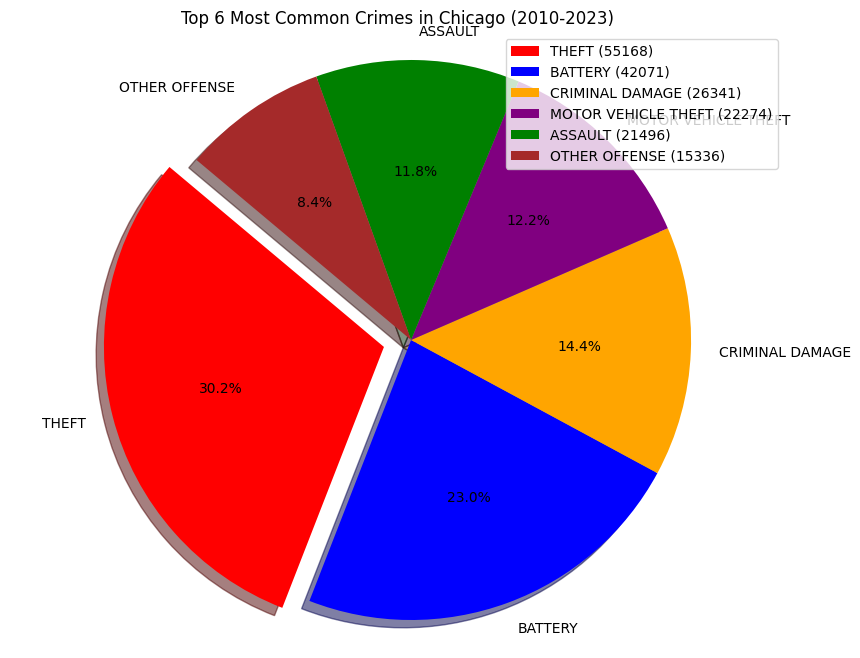

In [100]:
#What are the 6 most common crimes in Chicago from 2010-2023?
crime_counts = final_crime_data['Primary Type'].value_counts().head(6)
print(crime_counts)
# Create a pie chart

plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'orange', 'purple', 'green', 'brown']
explode = [0.1 if i == crime_counts.idxmax() else 0 for i in crime_counts.index]

plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Top 6 Most Common Crimes in Chicago (2010-2023)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with the actual numbers
plt.legend(crime_counts.index + ' (' + crime_counts.values.astype(str) + ')', loc='upper right')

plt.show()

# Which wards are most & least affected by these crimes?
Idea : to find the top 5 most  and least effected words , by the above mentioned set of crimes to get a better picture of the situation.
steps :
1.filter the data based on the top 6 types of crimes
2. find out the wards (top 5) most and least effected by the top 6 types of crimes.
3.create visualisation

In [164]:
# Filter for specific crimes
crimes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'DECEPTIVE PRACTICE']
filtered_top6_crimes = crime_data_cleaned[crime_data_cleaned['Primary Type'].isin(crimes)]
filtered_top6_crimes = filtered_top6_crimes.dropna()
filtered_top6_crimes = filtered_top6_crimes.dropna(axis=1)
filtered_top6_crimes

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
7542385,HS346368,6/6/10 22:50,030XX W 38TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,...,12.0,58,14,1156811.0,1879273.0,2010,3/13/24 15:44,41.824498,-87.700219,"(41.824497605, -87.700218972)"
7301394,HS105185,1/4/10 18:00,012XX W 111TH PL,810,THEFT,OVER $500,STREET,False,False,2234,...,34.0,75,6,1170062.0,1830842.0,2010,3/19/24 16:10,41.691318,-87.653010,"(41.691318395, -87.653010272)"
7645511,HS449967,8/7/10 2:17,040XX W 115TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2211,...,19.0,74,08B,1151280.0,1828011.0,2010,9/7/21 15:41,41.683936,-87.721847,"(41.683936056, -87.721847364)"
7779060,HS586771,10/28/10 4:00,040XX W 115TH ST,560,ASSAULT,SIMPLE,RESIDENCE,False,True,2211,...,19.0,74,08A,1151285.0,1828011.0,2010,9/7/21 15:41,41.683936,-87.721829,"(41.683935959, -87.721829061)"
7306788,HS110649,1/8/10 11:35,017XX W HOWARD ST,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,2422,...,49.0,1,6,1163126.0,1950347.0,2010,2/10/18 15:50,42.019399,-87.675049,"(42.019399237, -87.675049485)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546357,JH366828,7/29/24 14:50,079XX S CICERO AVE,820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,834,...,18.0,70,6,1145805.0,1851340.0,2024,8/6/24 15:40,41.748060,-87.741303,"(41.748060338, -87.741302702)"
13551304,JH367712,7/29/24 12:00,017XX W COLUMBIA AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,2432,...,49.0,1,10,1163332.0,1944875.0,2024,8/6/24 15:40,42.004380,-87.674446,"(42.004379605, -87.674446418)"
13546005,JH366783,7/29/24 1:00,051XX S INDIANA AVE,920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,231,...,3.0,40,7,1178471.0,1870988.0,2024,8/6/24 15:40,41.801297,-87.621007,"(41.801297379, -87.621007472)"


TO BE CLEANED UP


In [264]:
filtered_top6_crimes_arrest_year=  filtered_top6_crimes[ (filtered_top6_crimes['Arrest'] == "True") & (filtered_top6_crimes['Year'] >= 2019)]
filtered_top6_crimes_arrest_year

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location,Mayor
ID,,,,,,,,,,,,,,,,,,,,,


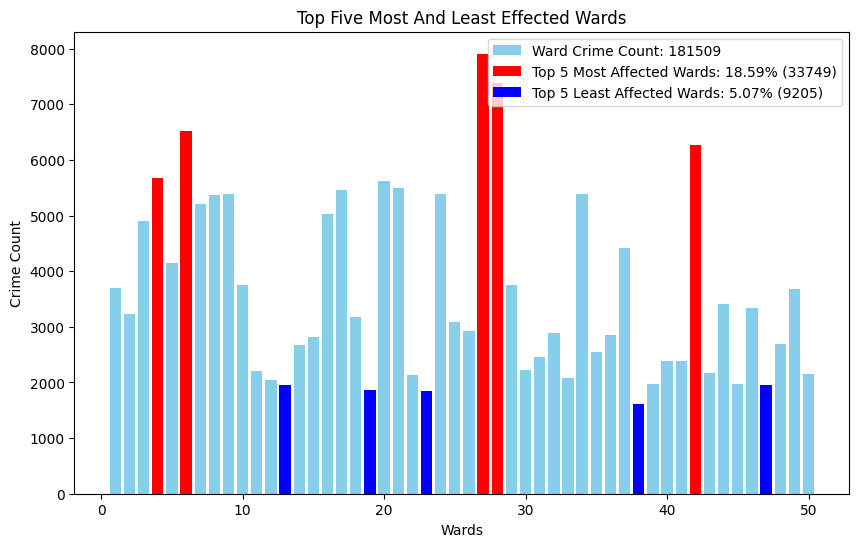

In [165]:
# Group by Ward and count occurrences
ward_crime_counts = filtered_top6_crimes.groupby('Ward').size().reset_index(name='Crime Count')

# Sort to find top 5 most and least affected wards
top_5_most_affected = ward_crime_counts.nlargest(5, 'Crime Count')
top_5_least_affected = ward_crime_counts.nsmallest(5, 'Crime Count')

# Calculate percentages
total_crimes = ward_crime_counts['Crime Count'].sum()
most_affected_percentage = top_5_most_affected['Crime Count'].sum() / total_crimes * 100
least_affected_percentage = top_5_least_affected['Crime Count'].sum() / total_crimes * 100

# Set colors
colors = ['skyblue'] * len(ward_crime_counts)
for idx, row in ward_crime_counts.iterrows():
    if row['Ward'] in top_5_most_affected['Ward'].values:
        colors[idx] = 'red'
    elif row['Ward'] in top_5_least_affected['Ward'].values:
        colors[idx] = 'blue'

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(ward_crime_counts['Ward'], ward_crime_counts['Crime Count'], color=colors)
plt.xlabel('Wards')
plt.ylabel('Crime Count')
plt.title('Top Five Most And Least Effected wards')

# Create custom legend
legend_elements = [
    Patch(facecolor='skyblue', label=f'Ward Crime Count: {total_crimes}'),
    Patch(facecolor='red', label=f'Top 5 Most Affected Wards: {most_affected_percentage:.2f}% ({top_5_most_affected["Crime Count"].sum()})'),
    Patch(facecolor='blue', label=f'Top 5 Least Affected Wards: {least_affected_percentage:.2f}% ({top_5_least_affected["Crime Count"].sum()})')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

In [166]:
#Is there a correlation between instance of crime and ward?


In [167]:
 #Calculate correlation
correlation = ward_crime_counts['Ward'].corr(ward_crime_counts['Crime Count'])
print(f"Correlation between Ward and Crime Count: {correlation}")

Correlation between Ward and Crime Count: -0.32285201748058406


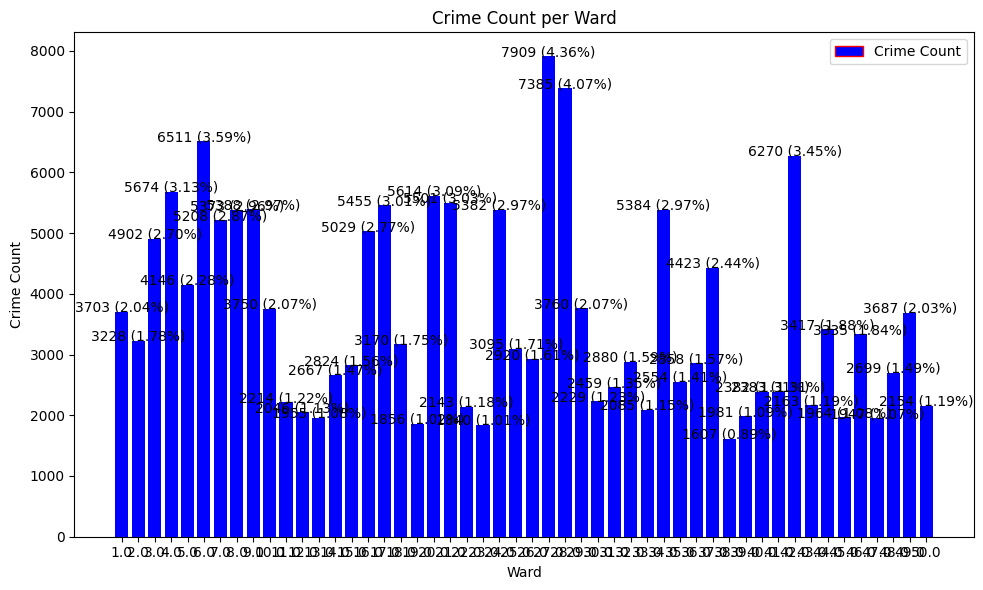

In [168]:
# Bar plot for all wards
# Plotting with patches and legends
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(ward_crime_counts['Ward'].astype(str), ward_crime_counts['Crime Count'], color='blue')

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval} ({(yval / ward_crime_counts['Crime Count'].sum()) * 100:.2f}%)", ha='center')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', edgecolor='r', label='Crime Count')]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_title('Crime Count per Ward')
ax.set_xlabel('Ward')
ax.set_ylabel('Crime Count')

plt.tight_layout()
plt.show()

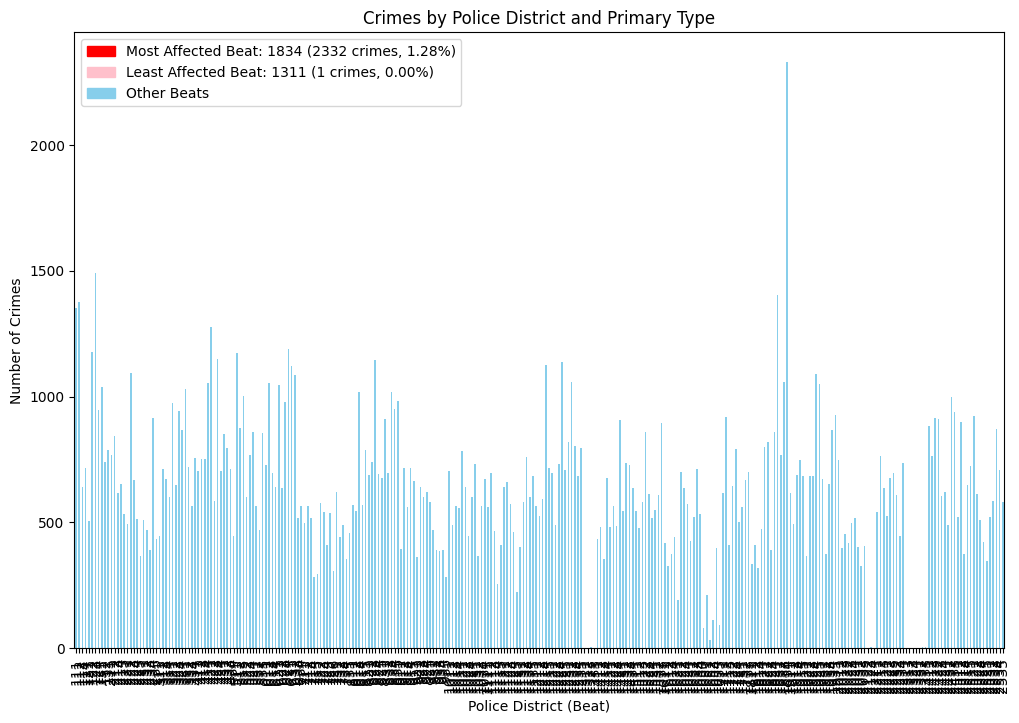

In [169]:
# Group by Beat and Primary Type to find the most and least affected police districts
beat_crime_counts = filtered_top6_crimes.groupby(['Beat', 'Primary Type']).size().unstack(fill_value=0)

# Calculate total crimes per beat
total_crimes_per_beat = beat_crime_counts.sum(axis=1)

# Identify most and least affected beats
most_affected_beat = total_crimes_per_beat.idxmax()
least_affected_beat = total_crimes_per_beat.idxmin()

# Plotting the bar chart
colors = ['red' if beat == most_affected_beat else 'pink' if beat == least_affected_beat else 'skyblue' for beat in total_crimes_per_beat.index]
beat_crime_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

# Adding legend patches
legend_patches = [Patch(color='red', label=f'Most Affected Beat: {most_affected_beat} ({total_crimes_per_beat[most_affected_beat]} crimes, {total_crimes_per_beat[most_affected_beat] / total_crimes_per_beat.sum() * 100:.2f}%)'),
                  Patch(color='pink', label=f'Least Affected Beat: {least_affected_beat} ({total_crimes_per_beat[least_affected_beat]} crimes, {total_crimes_per_beat[least_affected_beat] / total_crimes_per_beat.sum() * 100:.2f}%)'),
                  Patch(color='skyblue', label='Other Beats')]

plt.legend(handles=legend_patches)
plt.xlabel('Police District (Beat)')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Police District and Primary Type')
plt.show()

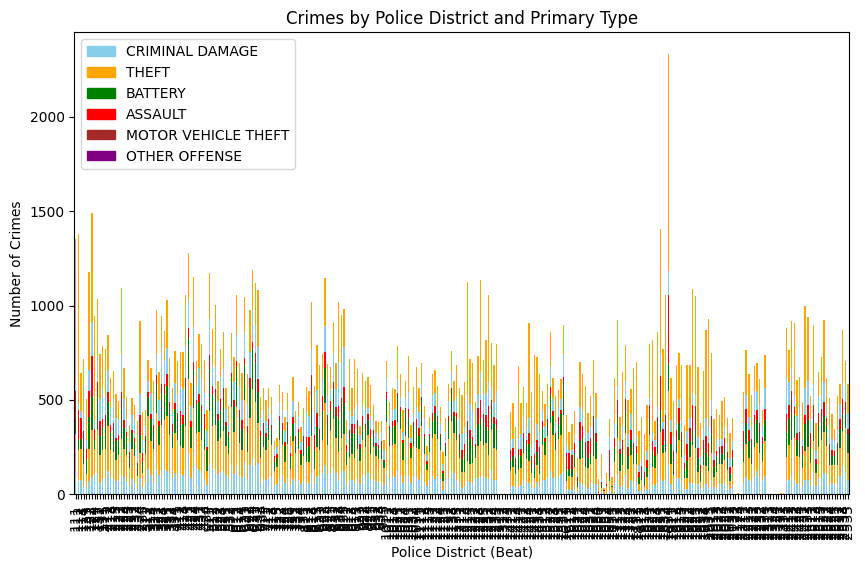

In [170]:
# Group by Beat and Primary Type to find the most and least affected police districts
PD_crime_counts = filtered_top6_crimes.groupby(['Beat', 'Primary Type']).size().unstack(fill_value=0)

# Plotting the histogram
PD_crime_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange', 'green', 'red'])

# Adding legend patches
legend_patches = [Patch(color='skyblue', label='CRIMINAL DAMAGE'),
                  Patch(color='orange', label='THEFT'),
                  Patch(color='green', label='BATTERY'),
                  Patch(color='red', label='ASSAULT'),
                  Patch(color='brown', label='MOTOR VEHICLE THEFT'),
                  Patch(color='purple', label='OTHER OFFENSE')
                ]

plt.legend(handles=legend_patches)
plt.xlabel('Police District (Beat)')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Police District and Primary Type')
plt.show()

In [171]:
#Is there a correlation between instance of crime and police district?
# Group by Police District and count the number of crimes
district_crime_counts = fil.groupby('Beat').size().reset_index(name='Crime Count')

correlation = filtered_top6_crimes['Beat'].astype(int).corr(filtered_top6_crimes['PD_crime_counts'])
print(f"Correlation between instances of crime and police district: {correlation}")

NameError: name 'fil' is not defined

#How has the prevalence of these crimes changed over time?

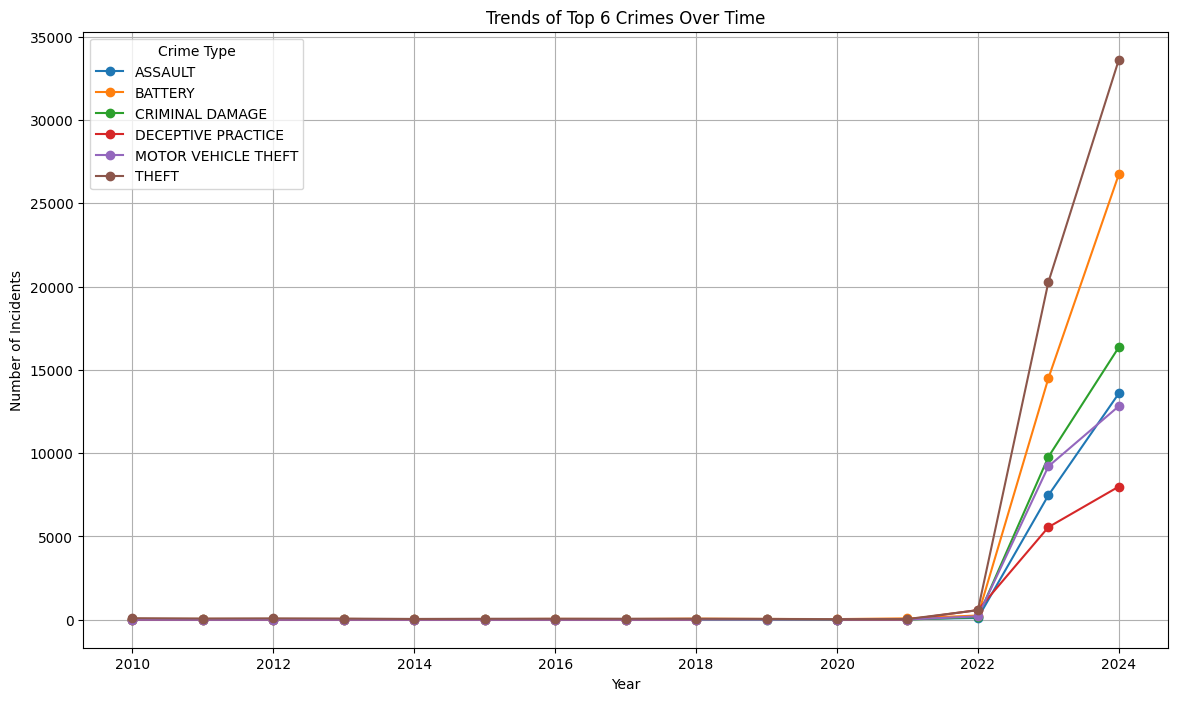

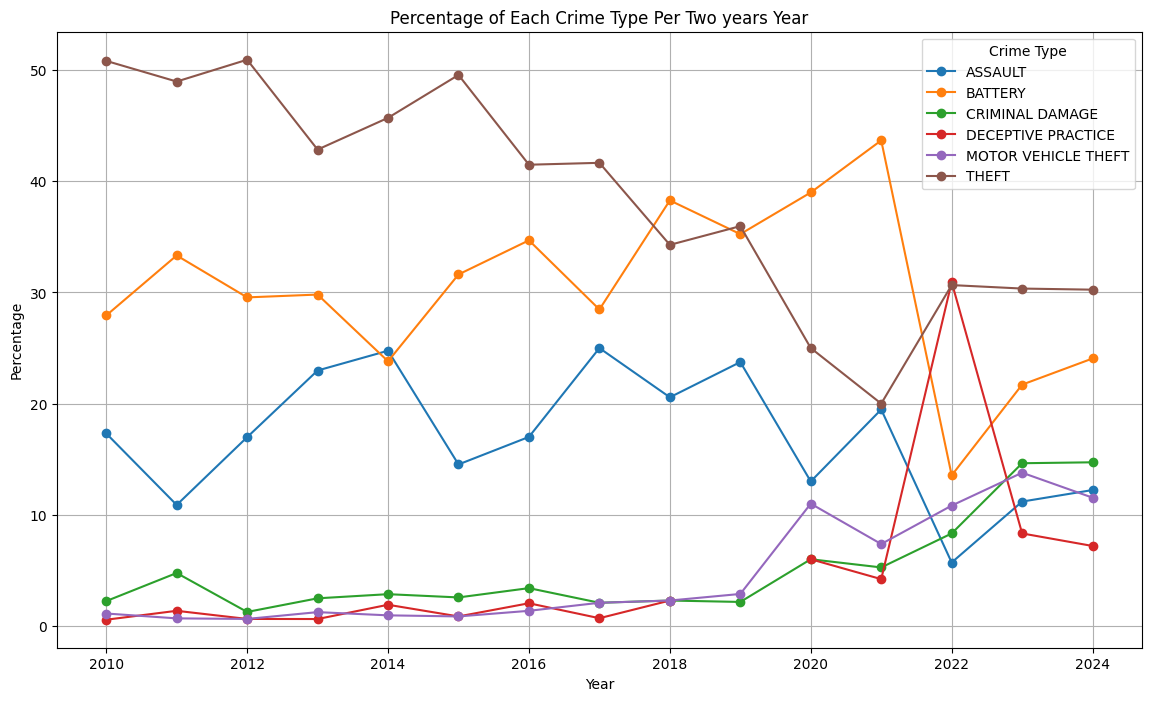

In [ ]:

# Group by 'Year' and 'Primary Type' to get the count of each crime type per year
crime_trends = filtered_top6_crimes.groupby(['Year', 'Primary Type']).size().unstack()

# Calculate the percentage of each crime type per year
crime_percentage = crime_trends.div(crime_trends.sum(axis=1), axis=0) * 100

# Plotting the trends
plt.figure(figsize=(14, 8))
for crime in crime_trends.columns:
    plt.plot(crime_trends.index, crime_trends[crime], marker='o', label=crime)

plt.title('Trends of Top 6 Crimes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()

# Plotting the percentage trends
plt.figure(figsize=(14, 8))
for crime in crime_percentage.columns:
    plt.plot(crime_percentage.index, crime_percentage[crime], marker='o', label=crime)

plt.title('Percentage of Each Crime Type Per Two years Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()

#What trends appeared in these crimes during the initial years of the Covid19 pandemic (2020-2022)

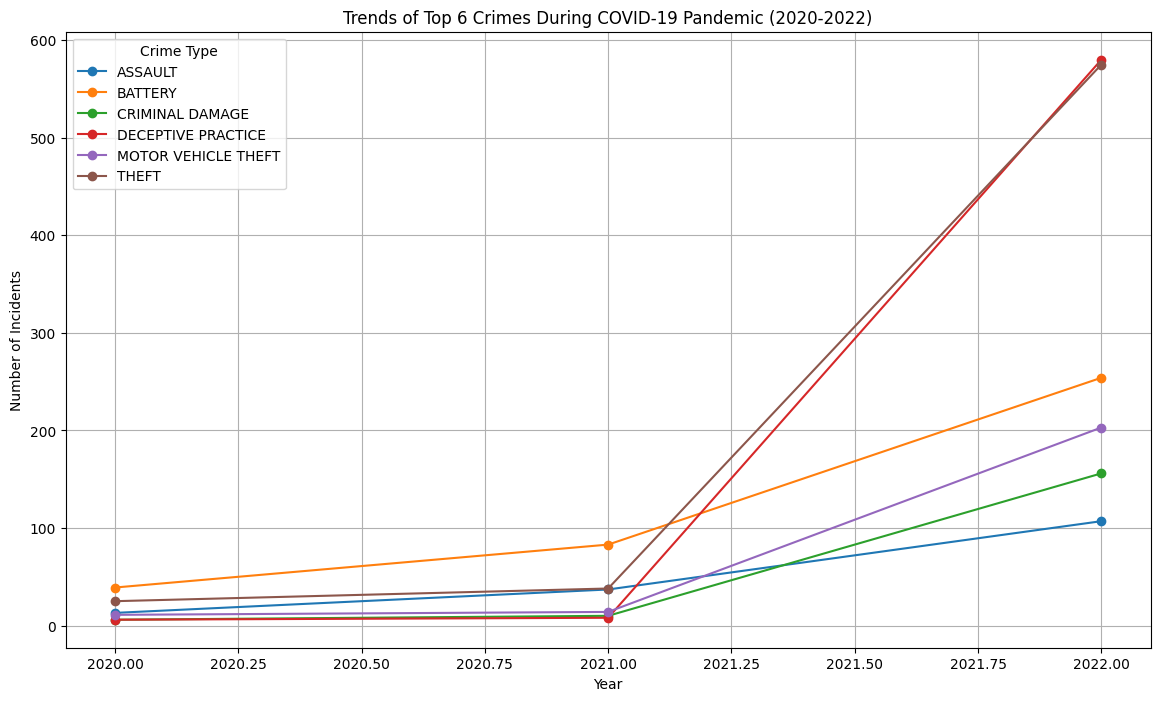

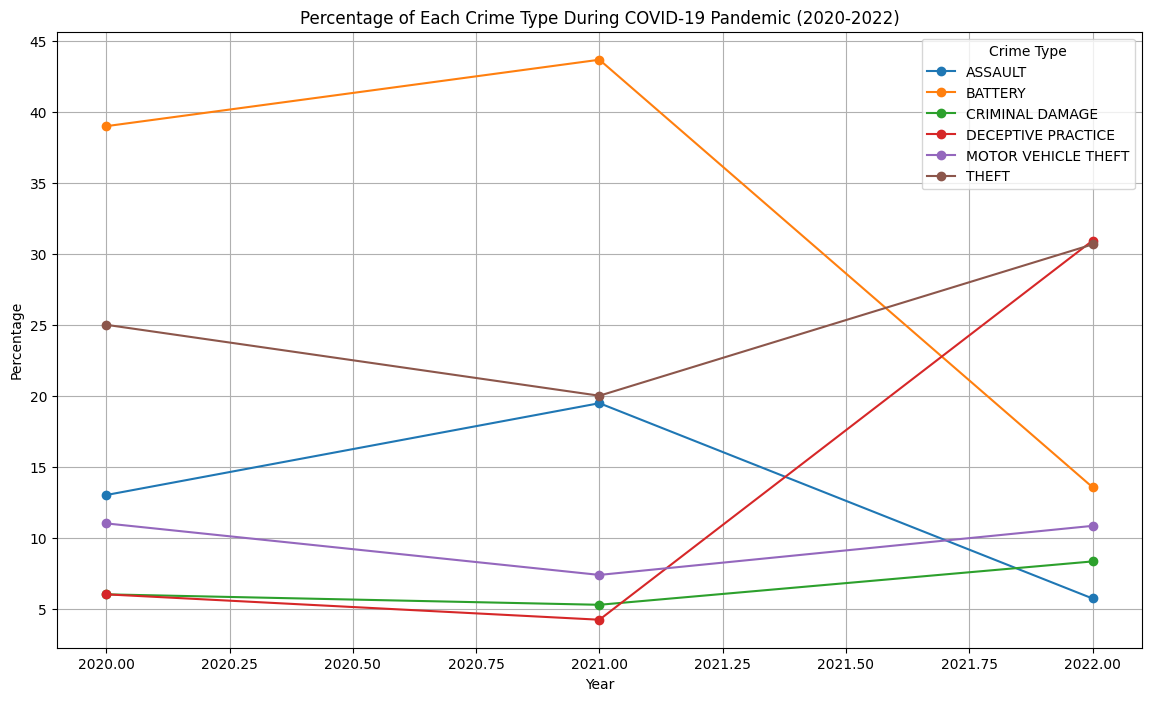

In [ ]:
# Filter data for the years 2020 to 2022
pandemic_years = filtered_top6_crimes[filtered_top6_crimes['Year'].isin([2020, 2021, 2022])]

# Group by 'Year' and 'Primary Type' to get the count of each crime type per year
crime_trends_pandemic = pandemic_years.groupby(['Year', 'Primary Type']).size().unstack()

# Calculate the percentage of each crime type per year
crime_percentage_pandemic = crime_trends_pandemic.div(crime_trends_pandemic.sum(axis=1), axis=0) * 100

# Plotting the total number of crimes
plt.figure(figsize=(14, 8))
for crime in crime_trends_pandemic.columns:
    plt.plot(crime_trends_pandemic.index, crime_trends_pandemic[crime], marker='o', label=crime)

plt.title('Trends of Top 6 Crimes During COVID-19 Pandemic (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()

# Plotting the percentage trends
plt.figure(figsize=(14, 8))
for crime in crime_percentage_pandemic.columns:
    plt.plot(crime_percentage_pandemic.index, crime_percentage_pandemic[crime], marker='o', label=crime)

plt.title('Percentage of Each Crime Type During COVID-19 Pandemic (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()

In [ ]:
#How do arrest rates compare to crime rates?


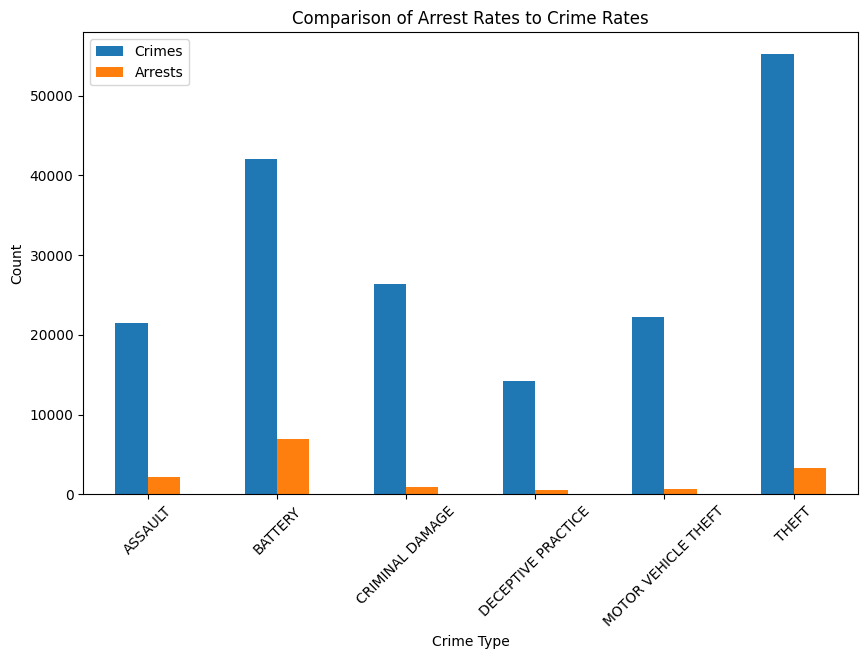

In [ ]:
# Group by Primary Type and count arrests
arrest_counts = filtered_top6_crimes.groupby('Primary Type')['Arrest'].sum()
crime_counts = filtered_top6_crimes['Primary Type'].value_counts()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Crimes': crime_counts, 'Arrests': arrest_counts})

# Plotting
ax = plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Arrest Rates to Crime Rates')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.legend(['Crimes', 'Arrests'])
plt.xticks(rotation=45)
plt.show()

In [233]:
#How do arrest rates & crime rates compare across mayoral terms?
mayor_data_df

,mayorname,start_year,end_year
0,Mayor A,1989,2011
1,Mayor B,2011,2019
2,Mayor C,2019,2023
3,Mayor D,2023,2024


In [244]:
# Function to get mayor based on year
def get_mayor(year):
    for _, row in mayor_data_df.iterrows():
        if row['start_year'] <= year <= row['end_year']:
            return row['mayorname']
    return None

# Add mayor column to the crimes DataFrame
filtered_top6_crimes['Mayor'] = filtered_top6_crimes['Year'].apply(get_mayor)
filtered_top6_crimes


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location,Mayor
ID,,,,,,,,,,,,,,,,,,,,,
7542385,HS346368,6/6/10 22:50,030XX W 38TH ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,...,58,14,1156811.0,1879273.0,2010,3/13/24 15:44,41.824498,-87.700219,"(41.824497605, -87.700218972)",Mayor A
7301394,HS105185,1/4/10 18:00,012XX W 111TH PL,810,THEFT,OVER $500,STREET,False,False,2234,...,75,6,1170062.0,1830842.0,2010,3/19/24 16:10,41.691318,-87.653010,"(41.691318395, -87.653010272)",Mayor A
7645511,HS449967,8/7/10 2:17,040XX W 115TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2211,...,74,08B,1151280.0,1828011.0,2010,9/7/21 15:41,41.683936,-87.721847,"(41.683936056, -87.721847364)",Mayor A
7779060,HS586771,10/28/10 4:00,040XX W 115TH ST,560,ASSAULT,SIMPLE,RESIDENCE,False,True,2211,...,74,08A,1151285.0,1828011.0,2010,9/7/21 15:41,41.683936,-87.721829,"(41.683935959, -87.721829061)",Mayor A
7306788,HS110649,1/8/10 11:35,017XX W HOWARD ST,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,2422,...,1,6,1163126.0,1950347.0,2010,2/10/18 15:50,42.019399,-87.675049,"(42.019399237, -87.675049485)",Mayor A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13546357,JH366828,7/29/24 14:50,079XX S CICERO AVE,820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,834,...,70,6,1145805.0,1851340.0,2024,8/6/24 15:40,41.748060,-87.741303,"(41.748060338, -87.741302702)",Mayor D
13551304,JH367712,7/29/24 12:00,017XX W COLUMBIA AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,2432,...,1,10,1163332.0,1944875.0,2024,8/6/24 15:40,42.004380,-87.674446,"(42.004379605, -87.674446418)",Mayor D
13546005,JH366783,7/29/24 1:00,051XX S INDIANA AVE,920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,231,...,40,7,1178471.0,1870988.0,2024,8/6/24 15:40,41.801297,-87.621007,"(41.801297379, -87.621007472)",Mayor D


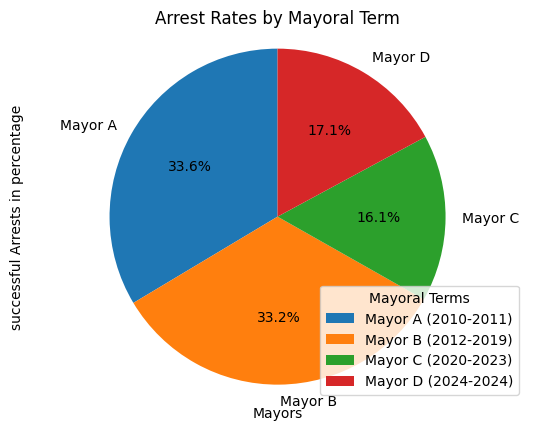

In [245]:
# Calculate arrest rates per mayoral term
arrest_rates = filtered_top6_crimes.groupby('Mayor')['Arrest'].mean() * 100
arrest_counts = filtered_top6_crimes.groupby('Primary Type')['Arrest'].sum()
crime_counts = filtered_top6_crimes['Primary Type'].value_counts()

# Plot pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(arrest_rates, labels=arrest_rates.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title
plt.title('Arrest Rates by Mayoral Term')
plt.xlabel('Mayors')
plt.ylabel('successful Arrests in percentage')
# Custom legend
legend_elements = [Patch(facecolor=wedges[i].get_facecolor(), label=f"{arrest_rates.index[i]} ({filtered_top6_crimes[filtered_top6_crimes['Mayor'] == arrest_rates.index[i]]['Year'].min()}-{filtered_top6_crimes[filtered_top6_crimes['Mayor'] == arrest_rates.index[i]]['Year'].max()})") for i in range(len(wedges))]
plt.legend(handles=legend_elements, title="Mayoral Terms", loc="lower right")

# Show plot
plt.show()

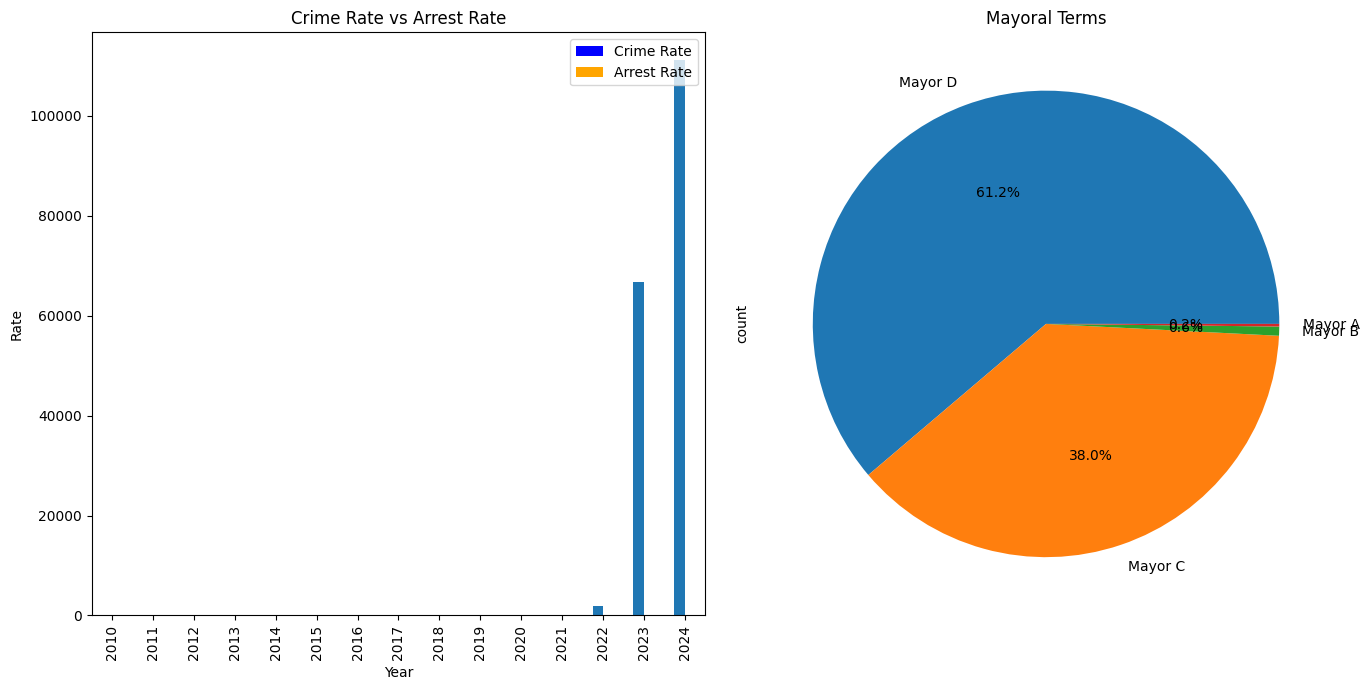

In [246]:
# Calculate crime rate and arrest rate
crime_rate = filtered_top6_crimes.groupby('Year').size()
arrest_rate = filtered_top6_crimes[filtered_top6_crimes['Arrest']].groupby('Year').size() / crime_rate

# Create a new DataFrame for visualization
visual_df = pd.DataFrame({
    'Crime Rate': crime_rate,
    'Arrest Rate': arrest_rate
}).fillna(0)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Bar plot for Crime Rate and Arrest Rate
visual_df.plot(kind='bar', ax=ax[0])
ax[0].set_title('Crime Rate vs Arrest Rate')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Rate')
ax[0].legend(['Crime Rate', 'Arrest Rate'])

# Pie chart for Mayor terms
mayor_counts = filtered_top6_crimes['Mayor'].value_counts()
mayor_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Mayoral Terms')

# Adding legend with patches
legend_elements = [Patch(facecolor='blue', label='Crime Rate'),
                   Patch(facecolor='orange', label='Arrest Rate')]
ax[0].legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

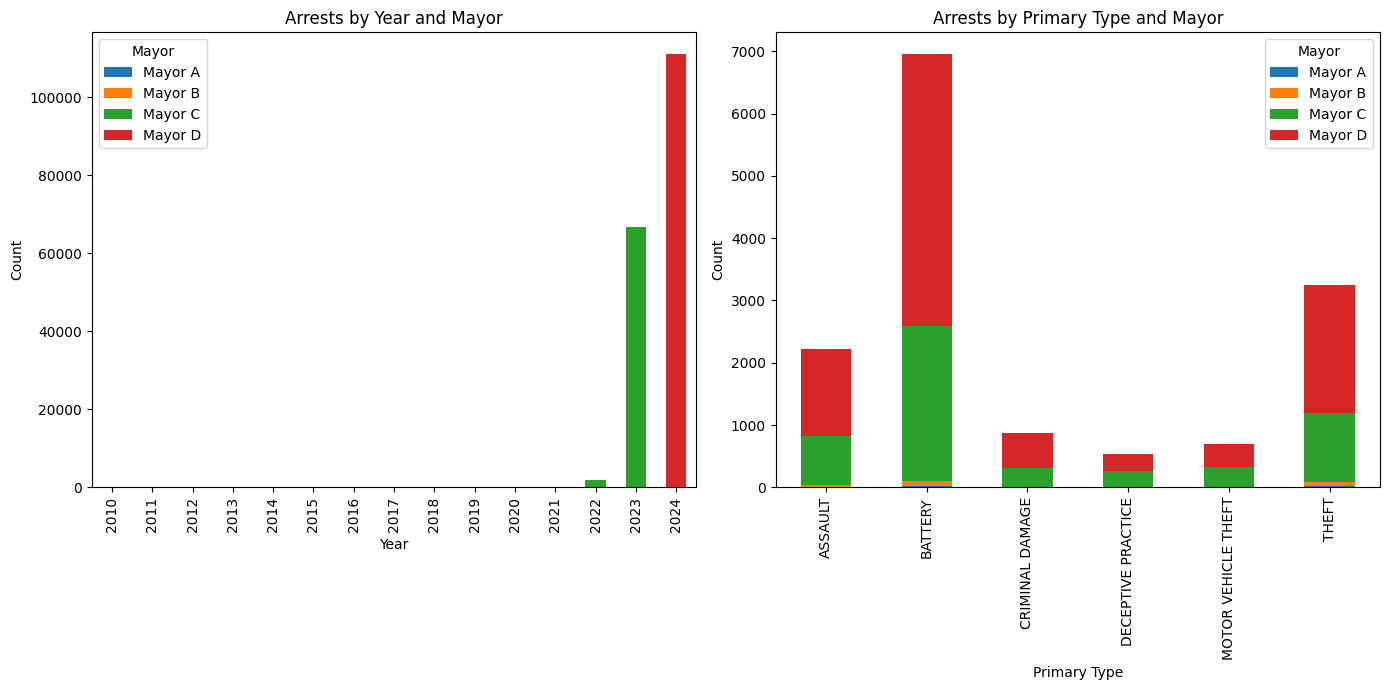

In [248]:
# Create a pivot table for visualization

pivot_table = filtered_top6_crimes.pivot_table(index='Primary Type', columns='Mayor', values='Arrest', aggfunc='sum', fill_value=0)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Bar plot for Arrests by Year and Mayor
arrests_by_year_mayor = filtered_top6_crimes.groupby(['Year', 'Mayor']).size().unstack().fillna(0)
arrests_by_year_mayor.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Arrests by Year and Mayor')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Bar plot for Arrests by Primary Type and Mayor
pivot_table.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Arrests by Primary Type and Mayor')
ax[1].set_xlabel('Primary Type')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()